In [1]:
%config InlineBackend.figure_formats = ['svg']
import sys
sys.path.insert(1, '../')

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from os import path

from deployment_instance import ExperimentResult
from src.ingest_data import ingest_experiment_results
from src.query_data import get_data_exfiltration_times, percent_of_data_exfiltrated, get_data_exfiltration_cdf
from statistics import mean
import seaborn as sns

import pandas as pd

font = {
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [2]:
# Baseline attacker
baseline_standalone_d0_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d0_h0'))
baseline_standalone_d2_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d2_h0'))
baseline_standalone_d4_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d4_h0'))
baseline_standalone_d6_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d6_h0'))
baseline_standalone_d8_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d8_h0'))
baseline_standalone_d10_h0 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d10_h0'))

baseline_standalone_d0_h50 = ingest_experiment_results(path.join('data/Standalone/EquifaxLarge/baseline_standalone_d0_h50'))

In [3]:
baseline_standalone_d0_h0_times = get_data_exfiltration_times(baseline_standalone_d0_h0, expected_files=48)
baseline_standalone_d2_h0_times = get_data_exfiltration_times(baseline_standalone_d2_h0, expected_files=48)
baseline_standalone_d4_h0_times = get_data_exfiltration_times(baseline_standalone_d4_h0, expected_files=48)
baseline_standalone_d6_h0_times = get_data_exfiltration_times(baseline_standalone_d6_h0, expected_files=48)
baseline_standalone_d8_h0_times = get_data_exfiltration_times(baseline_standalone_d8_h0, expected_files=48)
baseline_standalone_d10_h0_times = get_data_exfiltration_times(baseline_standalone_d10_h0, expected_files=48)

baseline_standalone_d0_h50_times = get_data_exfiltration_times(baseline_standalone_d0_h50, expected_files=48)

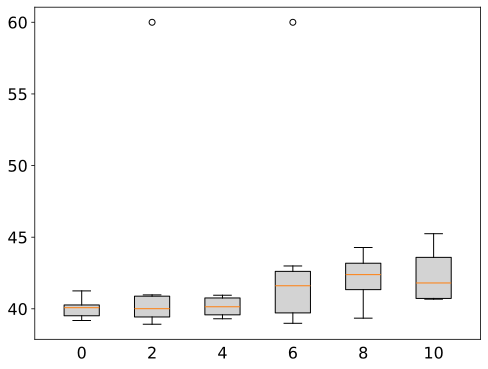

In [4]:
# Box plot comparing data exfiltration times
positions = [.3, .6, .9, 1.2, 1.5, 1.8]

data = [
        baseline_standalone_d0_h0_times['time_exfiltrated'], 
        baseline_standalone_d2_h0_times['time_exfiltrated'], 
        baseline_standalone_d4_h0_times['time_exfiltrated'], 
        baseline_standalone_d6_h0_times['time_exfiltrated'], 
        baseline_standalone_d8_h0_times['time_exfiltrated'], 
        baseline_standalone_d10_h0_times['time_exfiltrated']
        ]


plt.figure(figsize=(8, 6))
boxplot = plt.boxplot(data, positions=positions, patch_artist=True, widths=0.15)

plt.xticks(positions, ['0', '2', '4', '6', '8', '10'])
# hide xticks
# plt.xticks([])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

plt.ylabel('')
plt.xlabel('')
plt.title('')
# set x axis
plt.xlim(.1, 2)

# fill with colors
colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Output as svg
plt.savefig('./plots/costBenefit.svg', transparent=True)

In [9]:
# merge dicts
all_data = {}
all_data.update(baseline_standalone_d0_h0)
all_data.update(baseline_standalone_d10_h0)
all_data.update(baseline_standalone_d0_h50)

baseline_cdf = get_data_exfiltration_cdf(all_data, num_expected_files=46)

/home/brian/miniconda3/envs/openstack/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/brian/miniconda3/envs/openstack/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


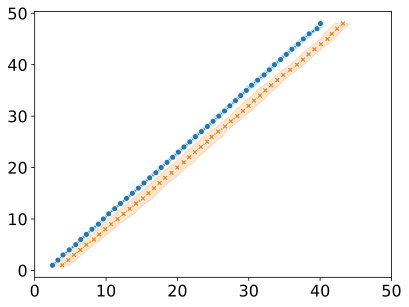

In [10]:
ax = sns.lineplot(data=baseline_cdf, 
             x="time_exfiltrated", y="file_number", hue="experiment",
             style="experiment", markers=True, dashes=True, legend=False, orient="y")
# Remove x-axis label
ax.set(xlabel=None)
ax.set(ylabel=None)

# Set x-axis from 10 to 45
ax.set_xlim(0, 50)

# Save as svg
plt = ax.get_figure()
plt.savefig('./plots/standalone_honeycred.svg', transparent=True)